In [ ]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [ ]:
dat = yf.Ticker("MSFT")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo') # 1 month of historical data
dat.option_chain(dat.options[0]).calls

In [ ]:
from data_fetch import get_price
start = '2024-01-01'
end = '2025-01-01'
prices = get_price(['AAPL', 'MSFT'], start, end)
prices

In [ ]:
#setting pandas to display floats with 2 decimal places
import pandas as pd

# Set pandas to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
prices['Close']

In [ ]:
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT']

portfolio = Portfolio()
for symbol in shares:
    portfolio.add_asset(symbol, 1)



start = '2024-01-01'
end = '2025-01-01'

prices_df = get_price(shares, start, end)
prices_close_df = prices_df['Close']

print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))
#plot_prices(prices_close_df)

In [ ]:
#1. getting data from yfinance
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])



prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)
prices_df

In [ ]:
import pandas as pd
#retrieve data from csv
prices_df = pd.read_csv('prices.csv', parse_dates=True)
prices_df

In [ ]:
fil = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    fil.append('Close'+'.'+str(i+1))
    print(fil)
#filtering the columns to get only the closing prices
prices_close_df = prices_df[fil]
prices_close_df

In [ ]:
column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new
prices_close_df


In [ ]:
#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])
prices_close_df

In [ ]:
prices_close_df.set_index('Date', inplace=True)
prices_close_df

In [ ]:
#Changing output of dataframe to float
print(portfolio.holdings['AAPL'])
print(type(float(prices_close_df['AAPL']['2024-01-02'])))
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))


In [ ]:
value = portfolio.get_portfolio_value(prices_close_df)
value

## Visualisations for the platform

In [ ]:
#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

## Making Dates Dynamic 

In [ ]:
import pandas as pd
#retrieve data from csv
prices_pdates = pd.read_csv('prices.csv', parse_dates=True)
prices_pdates = prices_pdates.drop([0, 1])
prices_pdates = prices_pdates.rename(columns={'Price': 'Date'})
prices_pdates

In [ ]:
from datetime import datetime
# prices_pdates.columns
prices_pdates_out = prices_pdates['Date']
prices_pdates_list= prices_pdates_out.tolist()
print(type(prices_pdates_list[0]))
prices_pdates_list_e1 =datetime.strptime(prices_pdates_list[0], '%Y-%m-%d') #Transform the first date to datetime object
prices_pdates_list_e1


In [ ]:
#turn values in Date column to datetime objects (PANDAS METHOD)
prices_pdates['Date_a'] = pd.to_datetime(prices_pdates['Date'])

In [ ]:
# Convert the 'Date' column to datetime objects (PYTHON METHOD)
prices_pdates['Date_ b'] = prices_pdates['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))  # Format to string

In [ ]:
# check the type of the first element in the 'Date' columns
print(type(prices_pdates['Date_a'].to_list()[0]))  # PANDAS METHOD
print(type(prices_pdates['Date_ b'].to_list()[0]))  # PYTHON METHOD

#both work. Need to change the code to use dynamic dates. 

# Backtester 1.0

['Price', 'Close', 'Close.1']
['Price', 'Close', 'Close.1', 'Close.2']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4', 'Close.5']
['Price', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4', 'Close.5', 'Close.6']
['Date', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
              AAPL    MSFT    GOOG    AMZN     TSLA    NVDA    NFLX
Date                                                               
1980-12-12     0.1     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-15    0.09     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-16    0.09     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-17    0.09     NaN     NaN     NaN      NaN     NaN     NaN
1980-12-18    0.09     NaN     NaN     NaN      NaN     NaN     NaN
...            ...     ...     ...     ...      ...     ...     ...
2025-05-19  208.78  206.16  167.87  458.87  11

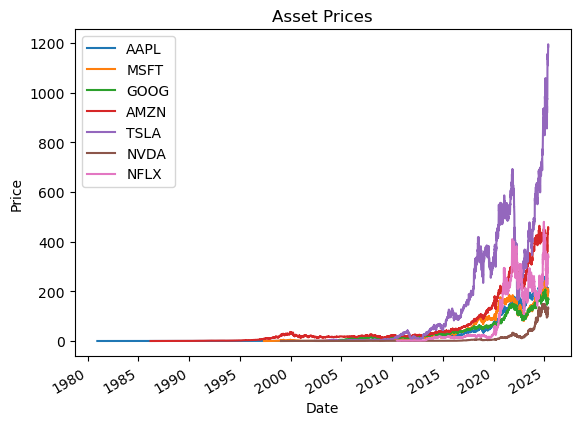

In [3]:
# Bring it all together for a 1.0 version. 
## 1. DATA FETCHING
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_prices
import pandas as pd
import datetime

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])



#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)


#retrieve data from csv
prices_df = pd.read_csv('prices.csv')
prices_df

columns_to_filter = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    columns_to_filter.append('Close'+'.'+str(i+1))
    print(columns_to_filter)

#filtering the columns to get only the closing prices
prices_close_df = prices_df[columns_to_filter]

column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new

#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])

# Convert 'Date' column to datetime objects
prices_close_df['Date'] = pd.to_datetime(prices_close_df['Date'])
prices_close_df.set_index('Date', inplace=True)
print(prices_close_df)
print(type(prices_close_df.index[-1]))

#Time delat 
print(datetime.datetime.now() - prices_close_df.index[-1])  # Check the time difference from the last date in the DataFrame

#Changing output of dataframe to float
#print(portfolio.holdings['AAPL'])
#print(prices_close_df['AAPL'])
#print(prices_close_df['AAPL']['2025-05-23'])
#today = pd.Timestamp(datetime.date.today()) #get a timestamp date
#print(today not in prices_close_df['AAPL'].index)
date = datetime.datetime.strptime("2024-12-31", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df, date))


#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

#both work. Need to change the code to use dynamic dates. 

In [4]:
date = datetime.datetime.strptime("2024-12-28", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
i = get_closest_date_index(date, prices_close_df)
i

Timestamp('2024-12-27 00:00:00')